<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/med_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [20]:
import tensorflow as tf

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-17 05:07:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-17 05:07:35 (72.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [42]:
from helper_functions import calculate_results,create_tensorboard_callback

In [3]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [4]:
import os

filenames = [data_dir + "/"+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Preprocess data

In [5]:
def get_lines(filename):
  """
  Reads filename and return the lines of text as a list

  Args:
  filename

  Returns:
  List of lines
  """

  with open(filename, "r") as f:
    return f.read().splitlines()

In [6]:
train_lines = get_lines(filenames[1])
train_lines[0:10]

['###24293578',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensiti

In [7]:
from inspect import currentframe
def preprocesses_line(filename):
  """
  Returns list of dictionaries
  """

  input_line = get_lines(filename)
  text = []
  category =[]
  line_nums = []
  max_lines =[]


  curr_max= 0

  for line in input_line:
    if not '###' in line:
      if line == "":
        for x in range(curr_max):
          max_lines.append(curr_max)
        continue
      else:
        curr_max += 1
        line_nums.append(line_number)
        line_number += 1
        split = line.split("\t")
        category.append(split[0])
        text.append(split[1])

    else:

      line_number =0
      curr_max = 0


  return {"line_number": line_nums, "text": text, "category": category, "max" :max_lines}

In [8]:
import pandas as pd
test_df = pd.DataFrame(preprocesses_line(filenames[0]))
txt_dict_train = preprocesses_line(filenames[1])
val_df = pd.DataFrame(preprocesses_line(filenames[2]))
train_df = pd.DataFrame(txt_dict_train)

<Axes: ylabel='Frequency'>

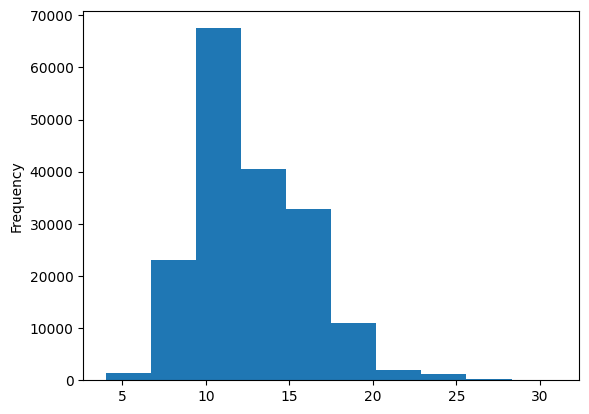

In [9]:
train_df['max'].plot.hist()

## Get list of sentences

In [10]:
train_sentences = train_df['text'].to_list()
val_sentences = val_df['text'].to_list()
test_sentences = test_df['text'].to_list()

## Encode Labels

In [11]:
import sklearn

encoder = sklearn.preprocessing.OneHotEncoder()

train_onelabels = encoder.fit_transform(train_df['category'].to_numpy().reshape(-1,1))
train_onelabels = train_onelabels.toarray()
test_onelabels = encoder.fit_transform(test_df['category'].to_numpy().reshape(-1,1))
test_onelabels = test_onelabels.toarray()
val_onelabels = encoder.fit_transform(val_df['category'].to_numpy().reshape(-1,1))
val_onelabels = val_onelabels.toarray()

In [12]:
label_encoder = sklearn.preprocessing.LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['category'])
test_labels = label_encoder.fit_transform(test_df['category'])
val_labels = label_encoder.fit_transform(val_df['category'])
train_labels, len(train_labels)


(array([3, 2, 2, ..., 4, 1, 1]), 180040)

In [13]:
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Model 0 baseline naive bayes

In [ ]:
model_0 = sklearn.pipeline.Pipeline([
    ("tfid", sklearn.feature_extraction.text.TfidfVectorizer()),
    ("clf", sklearn.naive_bayes.MultinomialNB())
])

In [ ]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences, val_labels)

0.716674962667994

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([2, 2, 2, 4, 4, 4, 4, 1, 4, 0])

In [ ]:
from helper_functions import calculate_results,create_tensorboard_callback
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1': 0.6925101703856846}

## Model 1 Conv1D

In [ ]:
import tensorflow as tf

txt_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 6800,
                                                   output_sequence_length = 55)

txt_vectoriser.adapt(train_sentences)

In [ ]:
txt_vectoriser.get_vocabulary()[:5]

['', '[UNK]', 'the', 'and', 'of']

In [ ]:
embedding_layer = tf.keras.layers.Embedding(input_dim = txt_vectoriser.vocabulary_size(),
                                            output_dim = 128,
                                            embeddings_initializer = "uniform",
                                            mask_zero = True)

### Show embedding

In [ ]:
embedding_layer(txt_vectoriser(["this is a test"]))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[-0.01536166, -0.01033063, -0.04299449, ..., -0.0381698 ,
         -0.04981445, -0.04549911],
        [-0.01507404, -0.01180743,  0.01249956, ...,  0.02156189,
          0.00100298,  0.00477348],
        [ 0.04939293, -0.03660815,  0.03955736, ..., -0.0221833 ,
         -0.03584756,  0.04506122],
        ...,
        [-0.01832336,  0.03196028, -0.01010896, ...,  0.03338284,
         -0.04153739, -0.01069028],
        [-0.01832336,  0.03196028, -0.01010896, ...,  0.03338284,
         -0.04153739, -0.01069028],
        [-0.01832336,  0.03196028, -0.01010896, ...,  0.03338284,
         -0.04153739, -0.01069028]]], dtype=float32)>

### Creating datasets

* from tensor slices = from lists

In [ ]:
train_dataset=  tf.data.Dataset.from_tensor_slices((train_sentences, train_onelabels))
train_dataset = train_dataset.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_onelabels))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_onelabels))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = tf.keras.layers.Input(shape = (1,), dtype = tf.string)
x = txt_vectoriser(inputs)
x = embedding_layer(x)
x = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5, activation = "softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_conv1d")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_1.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
hist_1 = model_1.fit(train_dataset,
            epochs = 5,
            validation_data = val_dataset,
            callbacks = [create_tensorboard_callback("exp", "Conv1D")])

Saving TensorBoard log files to: exp/Conv1D/20250117-031733
Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.7139 - loss: 0.7543 - val_accuracy: 0.7984 - val_loss: 0.5543
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8173 - loss: 0.5081 - val_accuracy: 0.8064 - val_loss: 0.5356
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8368 - loss: 0.4585 - val_accuracy: 0.8088 - val_loss: 0.5325
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - accuracy: 0.8499 - loss: 0.4207 - val_accuracy: 0.8046 - val_loss: 0.5446
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.8623 - loss: 0.3883 - val_accuracy: 0.8077 - val_loss: 0.5647


In [ ]:
model_1.evaluate(test_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8137 - loss: 0.5381


[0.5449867248535156, 0.8137494921684265]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_class = tf.argmax(model_1_pred_probs, axis = 1).numpy()

942/942 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
calculate_results(y_true = val_labels,
                  y_pred = model_1_pred_class)

{'accuracy': 80.76986892317902,
 'precision': 0.8091426034066016,
 'recall': 0.8076986892317902,
 'f1': 0.8043538595270777}

## Model 3 Use combination of token and character level embeddings

In [14]:
def split_chars(text):
  return " ".join(list(text))

In [15]:
split_chars("hello world")

'h e l l o   w o r l d'

In [16]:
train_chars = [split_chars(text) for text in train_sentences]
test_chars = [split_chars(text) for text in test_sentences]
val_chars = [split_chars(text) for text in val_sentences]
train_chars[:5]

['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
 'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'O u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
char_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 60,
                                                    output_sequence_length = 290,
                                                    standardize =None)

In [ ]:
char_vectoriser.adapt(train_chars)

In [ ]:
len(char_vectoriser.get_vocabulary())

60

In [ ]:
embedding_layer_char = tf.keras.layers.Embedding(input_dim = 60,
                                                 output_dim = 25,
                                                 mask_zero = True)

In [ ]:
embedding_layer_char(char_vectoriser(["t h i s i s a t e s t"]))

<tf.Tensor: shape=(1, 290, 25), dtype=float32, numpy=
array([[[ 0.00077282,  0.01002719,  0.01295862, ...,  0.03264185,
         -0.04628773,  0.00652853],
        [-0.02498384,  0.04662443, -0.04918775, ..., -0.0409018 ,
          0.01857643, -0.02093091],
        [-0.01270636,  0.04762528, -0.01264491, ...,  0.01752516,
         -0.00294933,  0.03182096],
        ...,
        [-0.01073349,  0.04925275,  0.03688384, ..., -0.03768707,
          0.02842686, -0.02169645],
        [-0.01073349,  0.04925275,  0.03688384, ..., -0.03768707,
          0.02842686, -0.02169645],
        [-0.01073349,  0.04925275,  0.03688384, ..., -0.03768707,
          0.02842686, -0.02169645]]], dtype=float32)>

In [ ]:
inputs= tf.keras.layers.Input(shape = (1,), dtype = tf.string)
x = char_vectoriser(inputs)
x = embedding_layer_char(x)
x = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5, activation = "relu")(x)
model_2 = tf.keras.Model(inputs, outputs)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_2.compile(loss =tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
train_dataset_char = tf.data.Dataset.from_tensor_slices((train_chars, train_onelabels))
train_dataset_char = train_dataset_char.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_char = tf.data.Dataset.from_tensor_slices((test_chars, test_onelabels))
test_dataset_char = test_dataset_char.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_char = tf.data.Dataset.from_tensor_slices((val_chars, val_onelabels))
val_dataset_char = val_dataset_char.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
from subprocess import call
hist2 = model_2.fit(train_dataset_char,
                    epochs = 5,
                    validation_data = val_dataset_char,
                    callbacks = [create_tensorboard_callback("exp", "Conv1D_char")])

Saving TensorBoard log files to: exp/Conv1D_char/20250117-032155
Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.4086 - loss: 2.6837 - val_accuracy: 0.5320 - val_loss: 1.2068
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.4990 - loss: 1.2427 - val_accuracy: 0.4776 - val_loss: 1.3559
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.4917 - loss: 1.2709 - val_accuracy: 0.5517 - val_loss: 1.1626
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5413 - loss: 1.1705 - val_accuracy: 0.5654 - val_loss: 1.1541
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5563 - loss: 1.1496 - val_accuracy: 0.5654 - val_loss: 1.1177


In [ ]:
model_2.evaluate(test_dataset_char)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5724 - loss: 1.0971


[1.101279854774475, 0.5718257427215576]

In [ ]:
pred_class = tf.argmax(model_2.predict(test_dataset_char), axis =1).numpy()

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
calculate_results(test_labels,
                  pred_class)

{'accuracy': 57.182576459684896,
 'precision': 0.58620456404828,
 'recall': 0.571825764596849,
 'f1': 0.5470552925492641}

## Model 3 combining token embedding + character embeddings

In [ ]:
txt_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 6800,
                                                   output_sequence_length = 55)

txt_vectoriser.adapt(train_sentences)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(input_dim = txt_vectoriser.vocabulary_size(),
                                            output_dim = 128,
                                            embeddings_initializer = "uniform",
                                            mask_zero = True)

In [ ]:
char_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 60,
                                                    output_sequence_length = 290,
                                                    standardize =None)

char_vectoriser.adapt(train_chars)

In [ ]:
embedding_layer_char = tf.keras.layers.Embedding(input_dim = 60,
                                                 output_dim = 25,
                                                 mask_zero = True)

In [ ]:
token_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string, name = "token_input")
token_embeddings = txt_vectoriser(token_inputs)
token_embeddings = embedding_layer(token_embeddings)
token_output = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(token_embeddings)
token_output = tf.keras.layers.GlobalAveragePooling1D()(token_output)
token_output = tf.keras.layers.Dense(64, activation = "relu")(token_output)
token_model = tf.keras.Model(token_inputs, token_output)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
char_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string, name = "char_input")
tf.print(char_inputs)
char_embeddings = char_vectoriser(char_inputs)
tf.print(char_embeddings, summarize=-1)
char_embeddings = embedding_layer_char(char_embeddings)
tf.print(char_embeddings, summarize=-1)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(char_embeddings)
tf.print(char_bi_lstm, summarize=-1)
#char_output = tf.keras.layers.GlobalAveragePooling1D()(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

<KerasTensor shape=(None, 1), dtype=string, sparse=False, name=char_input>
<KerasTensor shape=(None, 290), dtype=int64, sparse=False, name=keras_tensor_20>
<KerasTensor shape=(None, 290, 25), dtype=float32, sparse=False, name=keras_tensor_21>
<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_23>


### concantenate token and char inputs

In [ ]:
token_char_concat = tf.keras.layers.Concatenate(name ="token_char_hybrid")([token_model.output, char_model.output])
combined_dropout = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(64, activation = "relu")(combined_dropout)
final_drop = tf.keras.layers.Dropout(0.5)(combined_dense)
combined_output = tf.keras.layers.Dense(5, activation = "softmax")(final_drop)

model_3 = tf.keras.Model([token_model.input, char_model.input], combined_output)

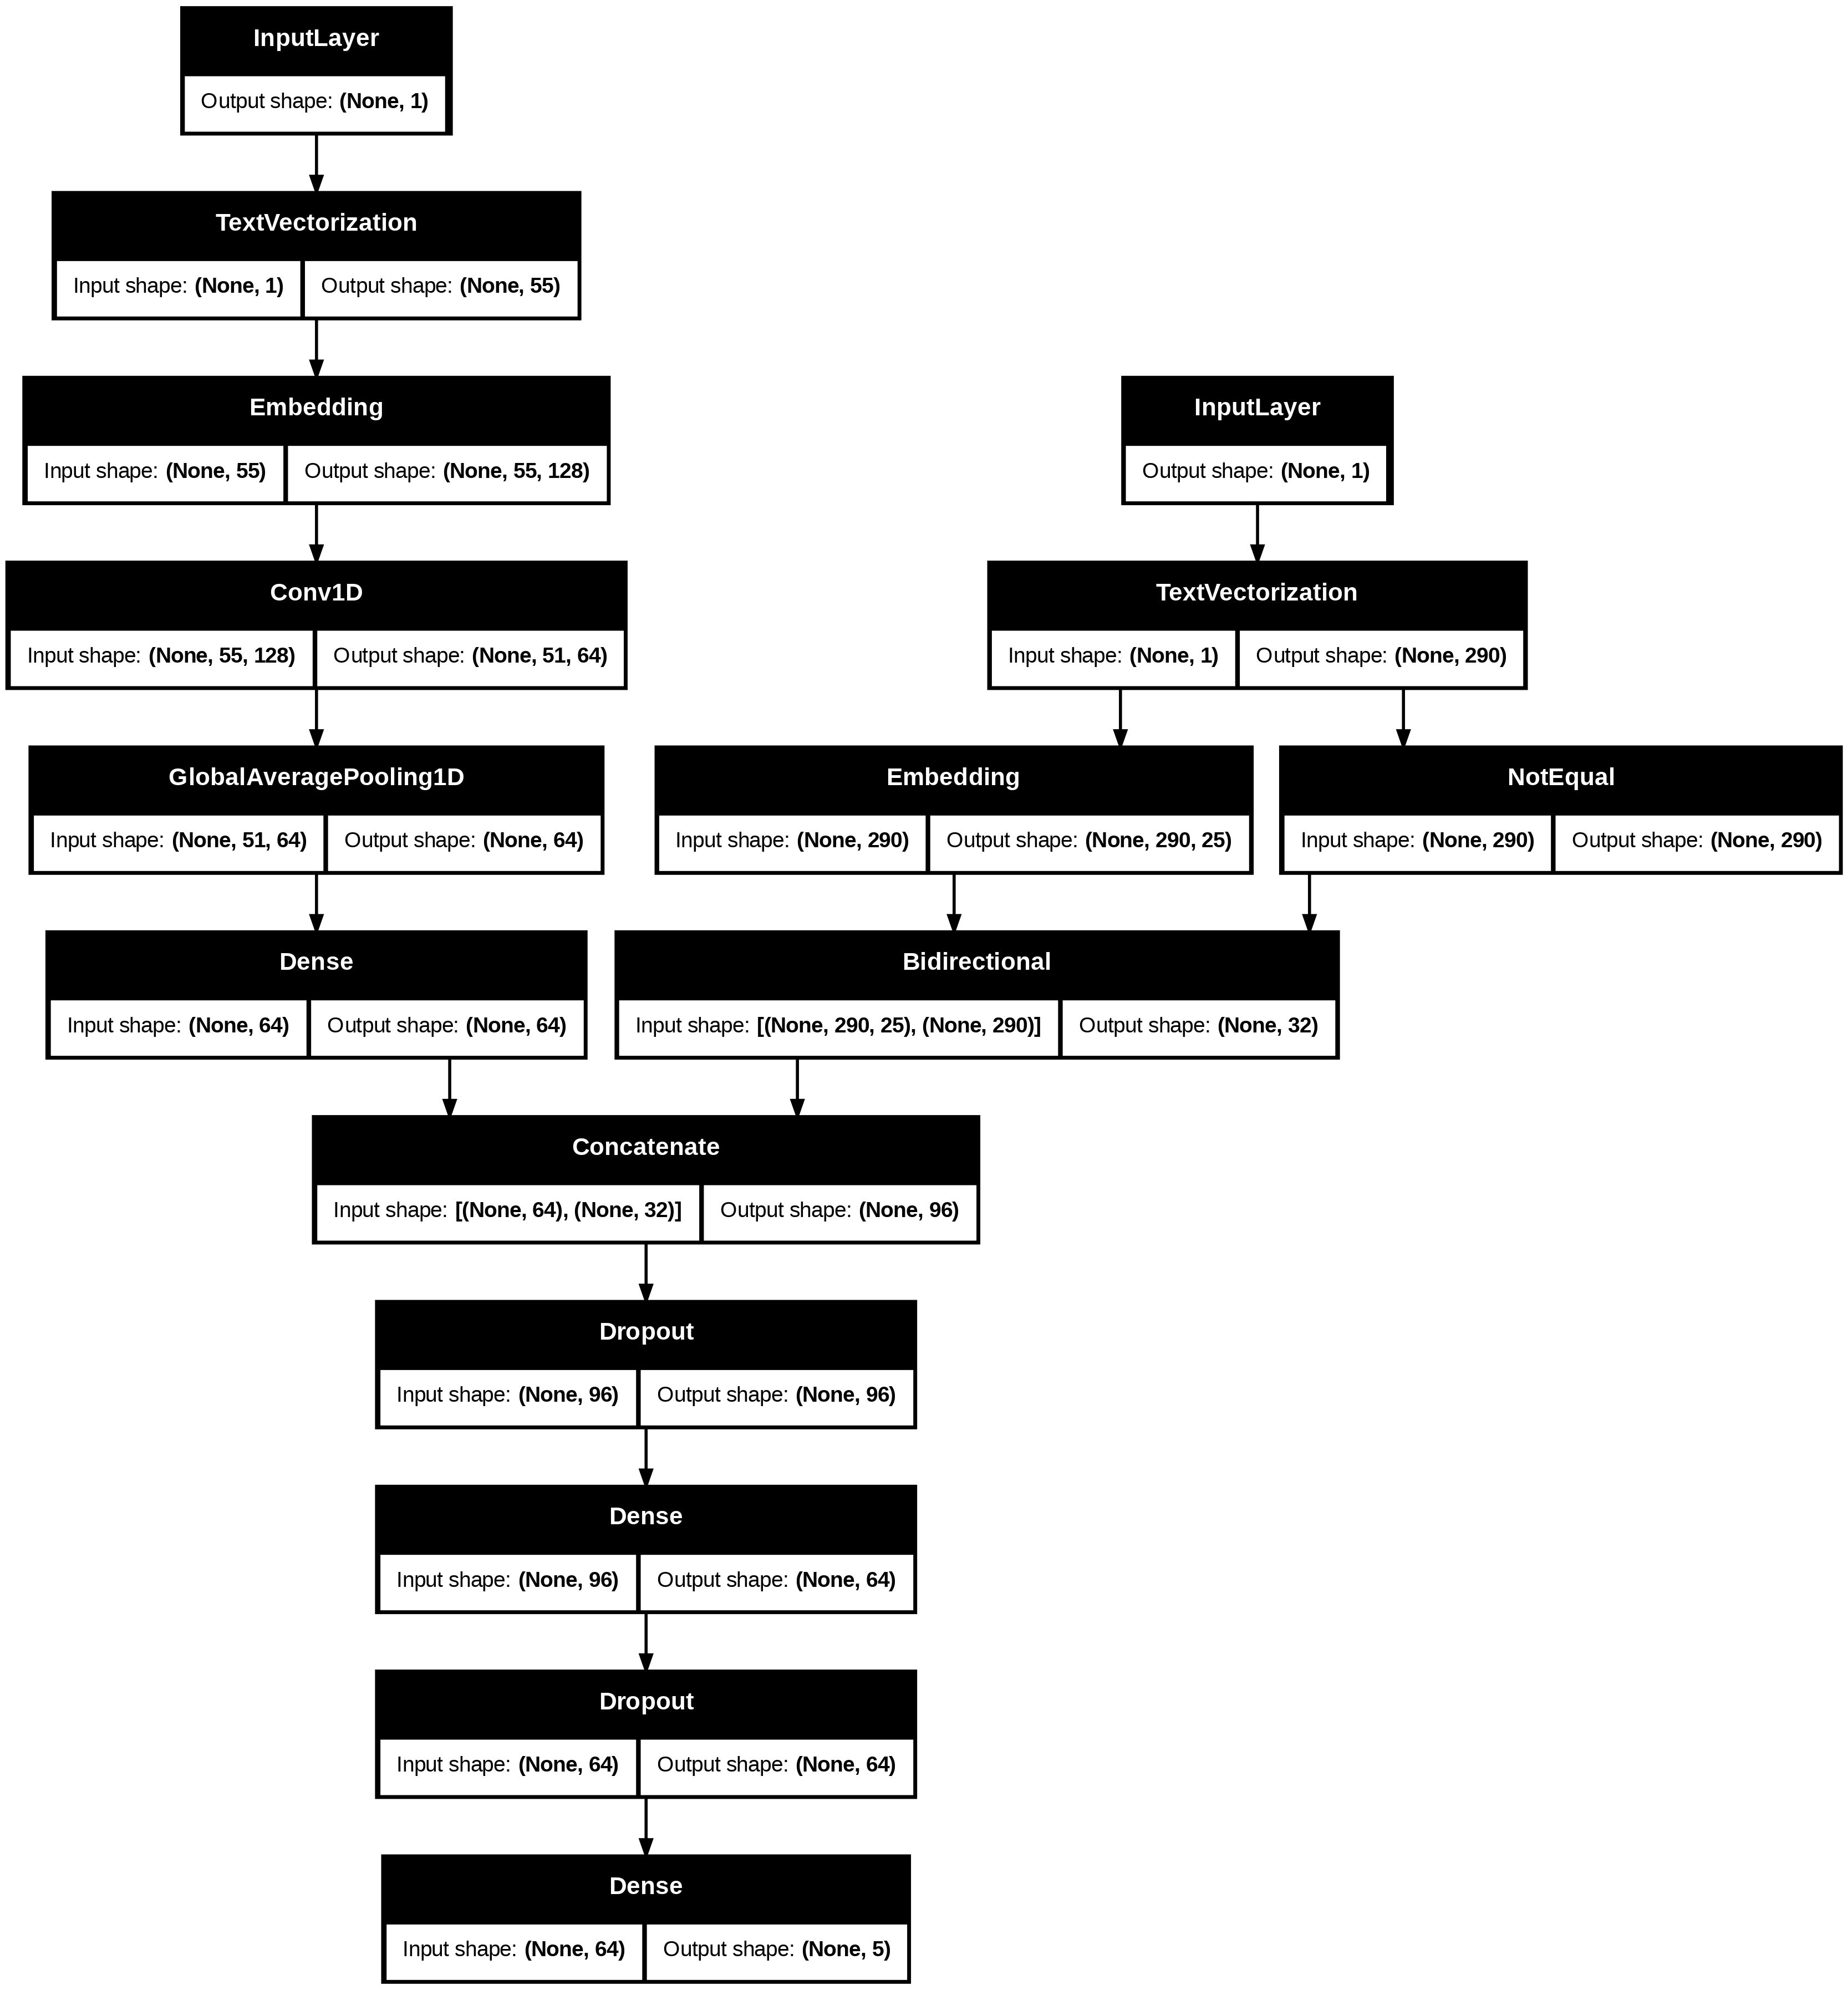

In [ ]:
tf.keras.utils.plot_model(model_3, show_shapes = True)

In [ ]:
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

###Combining token and character into a tf dataset

In [ ]:
train_token_char_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_onelabels)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_dataset, train_token_char_labels))

train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_token_char_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_onelabels)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_dataset, test_token_char_labels))

test_token_char_dataset = test_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_char_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_onelabels)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_dataset, val_token_char_labels))

val_token_char_dataset = val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_token_char_dataset, val_token_char_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
hist_3 = model_3.fit(train_token_char_dataset,
            epochs = 5,
            validation_data = val_token_char_dataset,
            callbacks = [create_tensorboard_callback("exp", "char+token_embedder")])

Saving TensorBoard log files to: exp/char+token_embedder/20250117-032535
Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 183s 32ms/step - accuracy: 0.4647 - loss: 1.2200 - val_accuracy: 0.7288 - val_loss: 0.6904
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 160s 28ms/step - accuracy: 0.7254 - loss: 0.7168 - val_accuracy: 0.7752 - val_loss: 0.6044
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 169s 30ms/step - accuracy: 0.7715 - loss: 0.6334 - val_accuracy: 0.7870 - val_loss: 0.5782
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 175s 31ms/step - accuracy: 0.7911 - loss: 0.5931 - val_accuracy: 0.7960 - val_loss: 0.5539
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 171s 30ms/step - accuracy: 0.8004 - loss: 0.5680 - val_accuracy: 0.7983 - val_loss: 0.5461


In [ ]:
model_3.evaluate(test_token_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8000 - loss: 0.5296


[0.5319827795028687, 0.80256187915802]

In [ ]:
model_3_preds = tf.argmax(model_3.predict(test_token_char_dataset), axis = 1).numpy()

945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step


In [ ]:
calculate_results(test_labels,
                  model_3_preds)

{'accuracy': 80.25618959353899,
 'precision': 0.8062091937497952,
 'recall': 0.80256189593539,
 'f1': 0.7995422852308303}

## Model 4: Model 3 + position_embedding

### Create positional embeddings

In [17]:
train_df.head()

,line_number,text,category,max
0,0,To investigate the efficacy of @ weeks of dail...,OBJECTIVE,12
1,1,A total of @ patients with primary knee OA wer...,METHODS,12
2,2,Outcome measures included pain reduction and i...,METHODS,12
3,3,Pain was assessed using the visual analog pain...,METHODS,12
4,4,Secondary outcome measures included the Wester...,METHODS,12


In [18]:
len(train_df)

180040

In [21]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:10]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>)

In [22]:
import numpy as np

np.percentile(train_df['max'], 98)

21.0

In [23]:
train_max_one_hot = tf.one_hot(train_df['max'].to_numpy(), depth = 20)
val_max_one_hot = tf.one_hot(val_df['max'].to_numpy(), depth = 20)
test_max_one_hot = tf.one_hot(test_df['max'].to_numpy(), depth = 20)

In [24]:
train_max_one_hot

<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

### creating model layers

In [25]:
txt_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 6800,
                                                   output_sequence_length = 55)

txt_vectoriser.adapt(train_sentences)

In [26]:
embedding_layer = tf.keras.layers.Embedding(input_dim = txt_vectoriser.vocabulary_size(),
                                            output_dim = 128,
                                            embeddings_initializer = "uniform",
                                            mask_zero = True)

In [27]:
char_vectoriser = tf.keras.layers.TextVectorization(max_tokens = 60,
                                                    output_sequence_length = 290,
                                                    standardize =None)

char_vectoriser.adapt(train_chars)

In [28]:
embedding_layer_char = tf.keras.layers.Embedding(input_dim = 60,
                                                 output_dim = 25,
                                                 mask_zero = True)

txt_vectoriser

In [29]:
token_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string, name = "token_input")
token_embeddings = txt_vectoriser(token_inputs)
token_embeddings = embedding_layer(token_embeddings)
token_output = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = "relu")(token_embeddings)
token_output = tf.keras.layers.GlobalAveragePooling1D()(token_output)
token_output = tf.keras.layers.Dense(64, activation = "relu")(token_output)
token_model = tf.keras.Model(token_inputs, token_output)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


charatcer level

In [30]:
char_inputs = tf.keras.layers.Input(shape =(1,), dtype = tf.string, name = "char_input")
tf.print(char_inputs)
char_embeddings = char_vectoriser(char_inputs)
tf.print(char_embeddings, summarize=-1)
char_embeddings = embedding_layer_char(char_embeddings)
tf.print(char_embeddings, summarize=-1)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(char_embeddings)
tf.print(char_bi_lstm, summarize=-1)
#char_output = tf.keras.layers.GlobalAveragePooling1D()(char_bi_lstm)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

<KerasTensor shape=(None, 1), dtype=string, sparse=False, name=char_input>
<KerasTensor shape=(None, 290), dtype=int64, sparse=False, name=keras_tensor_6>
<KerasTensor shape=(None, 290, 25), dtype=float32, sparse=False, name=keras_tensor_7>
<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_9>


line number

In [31]:
line_n_inputs = tf.keras.layers.Input(shape = (15,), dtype=tf.float32, name = "line_number_inputs")
line_outputs = tf.keras.layers.Dense(32, activation='relu')(line_n_inputs)
line_model = tf.keras.Model(line_n_inputs, line_outputs)

max lines

In [32]:
max_lines = tf.keras.layers.Input(shape = (20,), dtype = tf.float32, name = "max_lines")
line_outputs = tf.keras.layers.Dense(32, activation='relu')(max_lines)
max_model = tf.keras.Model(max_lines, line_outputs)

Combining token_char

In [33]:
token_char_concat = tf.keras.layers.Concatenate(name ="token_char_hybrid")([token_model.output, char_model.output])
z = tf.keras.layers.Dense(256, activation='relu')(token_char_concat)
z = tf.keras.layers.Dropout(0.5)(z)

In [34]:
everything_concat = tf.keras.layers.Concatenate(name = "everthing_combined")([z, line_model.output, max_model.output])

output_layer = tf.keras.layers.Dense(5, activation ='softmax')(everything_concat)

model = tf.keras.Model(inputs =[line_model.input,
                                max_model.input,
                                token_model.input,
                                char_model.input],
                       outputs = output_layer)

In [35]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ token_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization        │ (None, 55)             │              0 │ token_input[0][0]      │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 55, 128)        │        870,400 │ text_vectorization[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 51, 64)         │         41,024 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_vectorization_1      │ (None, 290)            │              0 │ char_input[0][0]       │
│ (TextVectorization)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ conv1d[0][0]           │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 290, 25)        │          1,500 │ text_vectorization_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 290)            │              0 │ text_vectorization_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          4,160 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 32)             │          5,376 │ embedding_1[0][0],     │
│ (Bidirectional)           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_char_hybrid         │ (None, 96)             │              0 │ dense[0][0],           │
│ (Concatenate)             │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │         24,832 │ token_char_hybrid[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ line_number_inputs        │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_lines (InputLayer)    │ (None, 20)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)      

 Total params: 950,081 (3.62 MB)

 Trainable params: 950,081 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

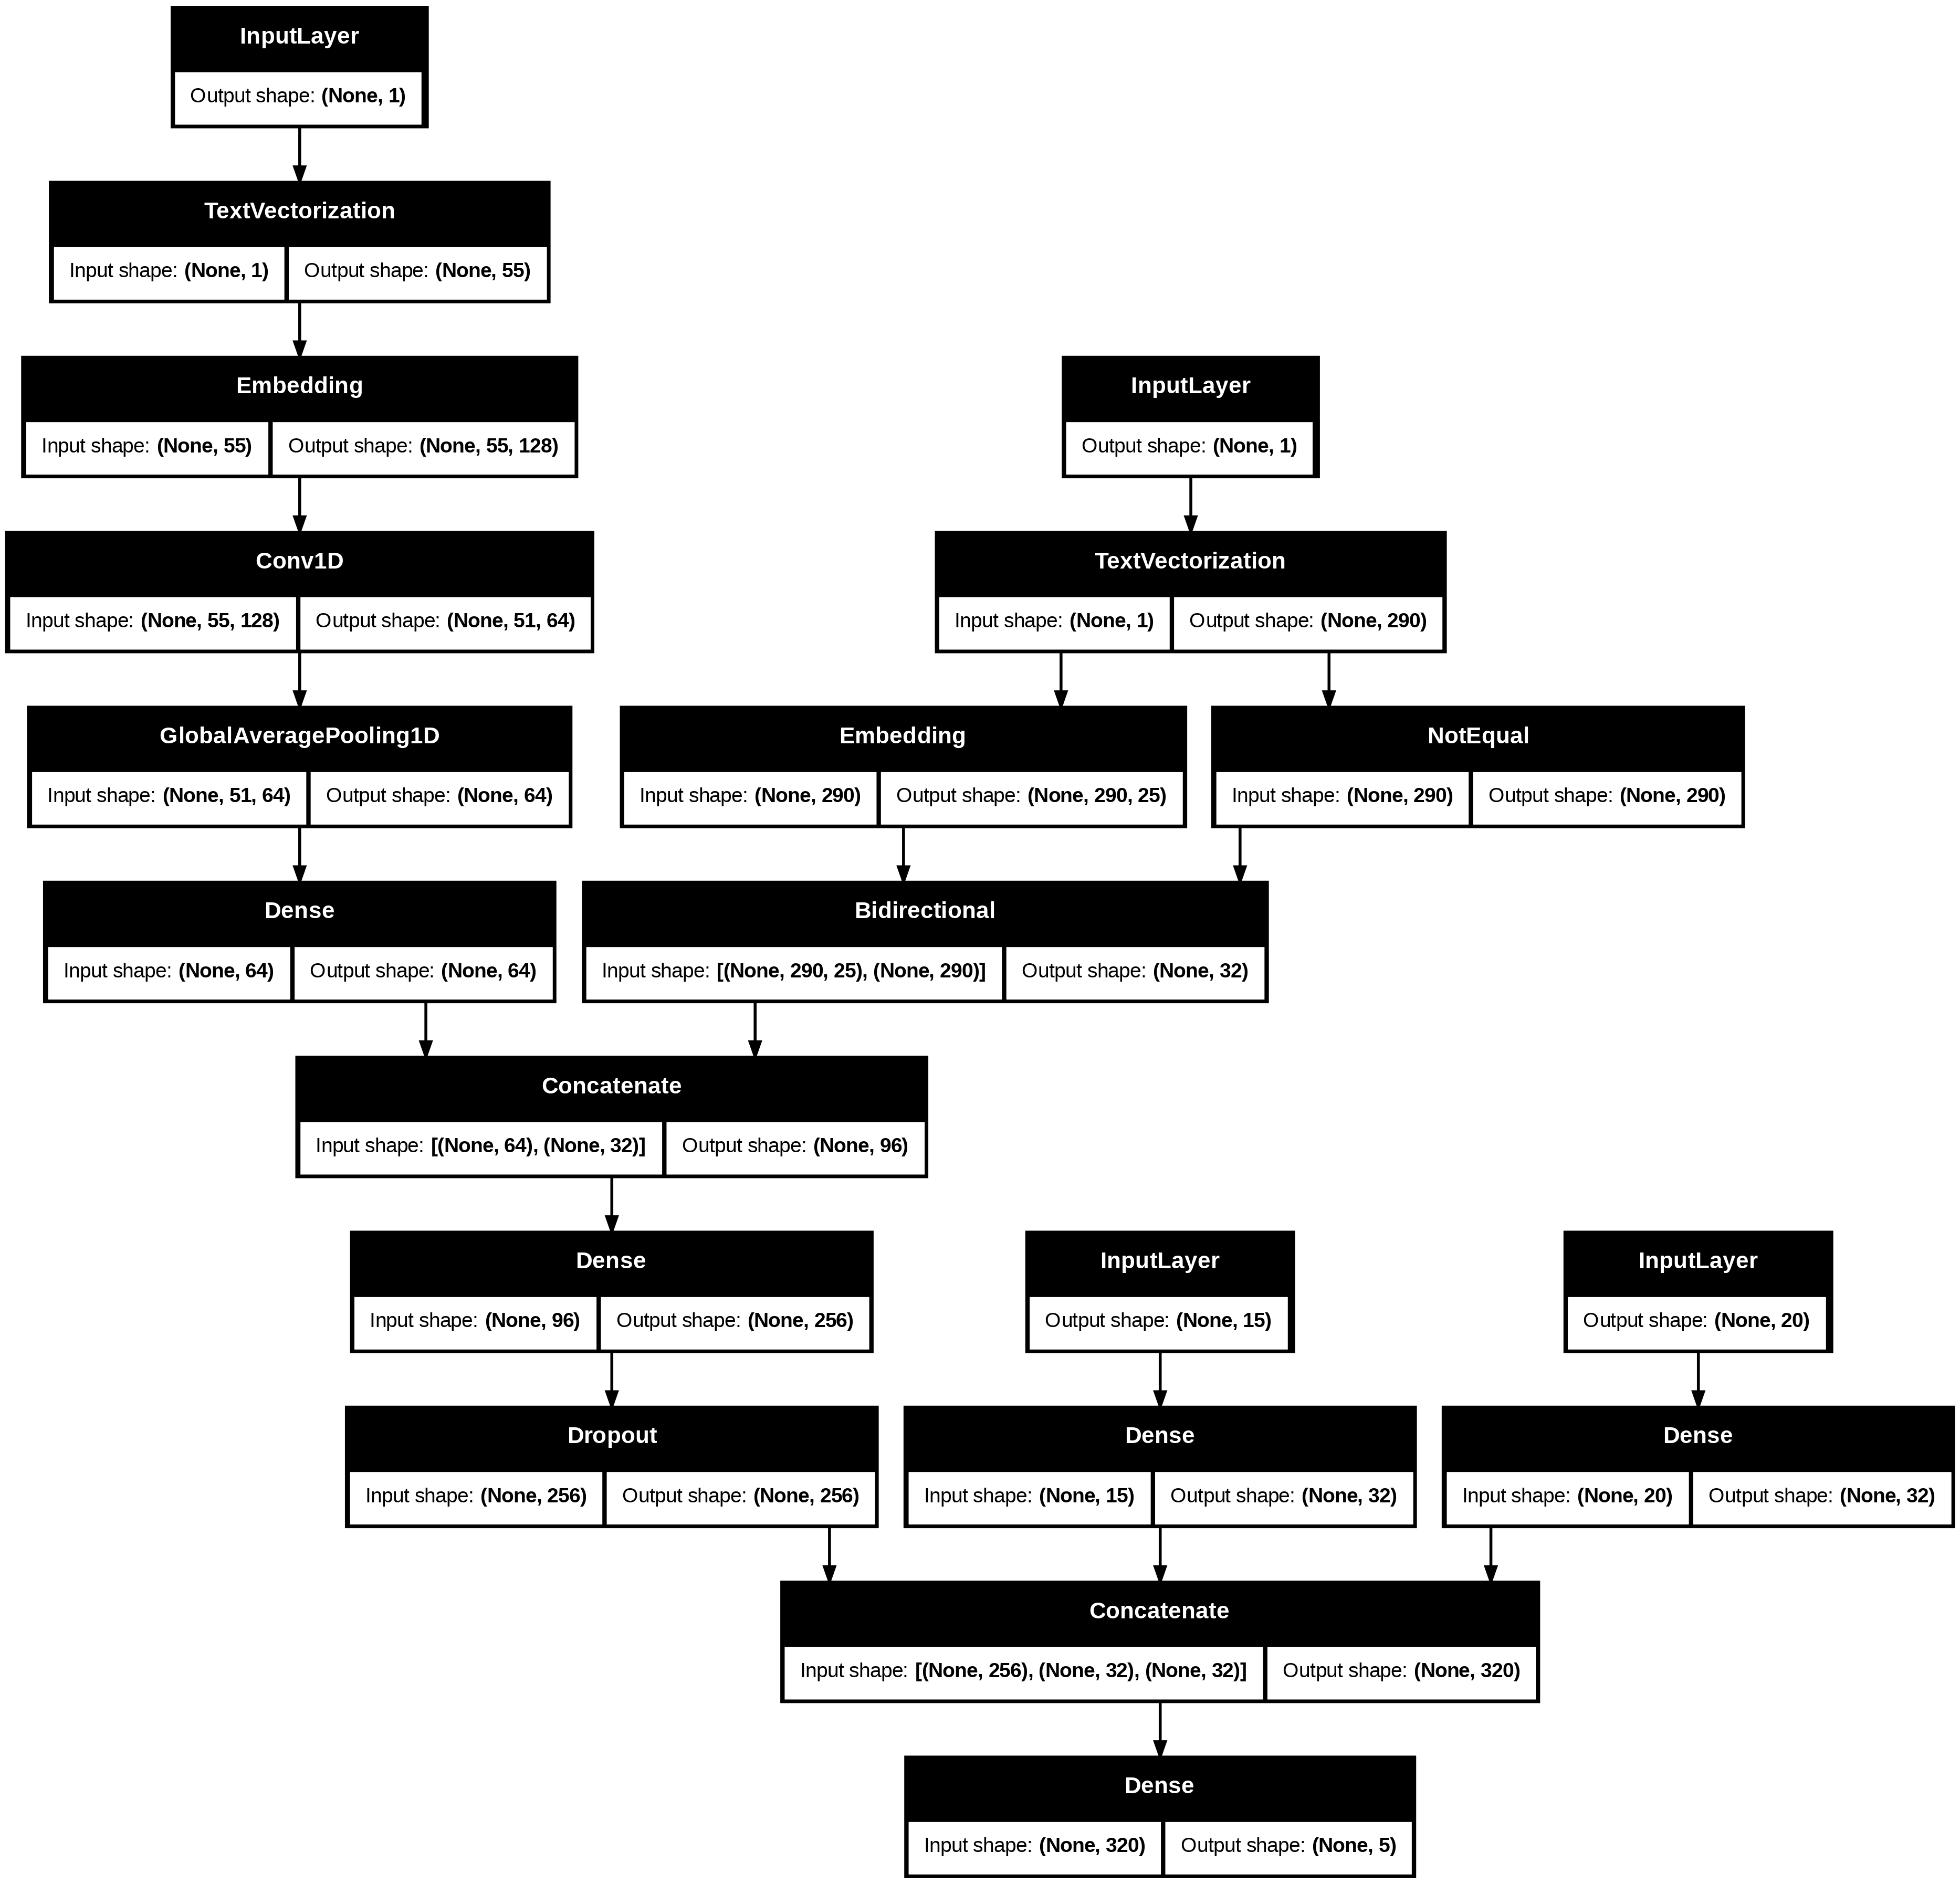

In [36]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [37]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing= 0.2),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

### creating datasets

In [38]:
train_token_char_dataset = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, train_max_one_hot,train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_onelabels)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_dataset, train_token_char_labels))

train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
test_token_char_dataset = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,test_max_one_hot,test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_onelabels)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_dataset, test_token_char_labels))

test_token_char_dataset = test_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [40]:
val_token_char_dataset = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot, val_max_one_hot, val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_onelabels)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_dataset, val_token_char_labels))

val_token_char_dataset = val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [43]:
hist_4 = model.fit(train_token_char_dataset,
                   epochs = 5,
                   validation_data = val_token_char_dataset,
                   callbacks =[create_tensorboard_callback("exp", "everything")])

Saving TensorBoard log files to: exp/everything/20250117-050947
Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 162s 27ms/step - accuracy: 0.7831 - loss: 1.0030 - val_accuracy: 0.8645 - val_loss: 0.8835
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 153s 27ms/step - accuracy: 0.8745 - loss: 0.8737 - val_accuracy: 0.8610 - val_loss: 0.8820
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 201s 27ms/step - accuracy: 0.8919 - loss: 0.8500 - val_accuracy: 0.8564 - val_loss: 0.8865
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 151s 27ms/step - accuracy: 0.9075 - loss: 0.8283 - val_accuracy: 0.8496 - val_loss: 0.8985
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 152s 27ms/step - accuracy: 0.9214 - loss: 0.8099 - val_accuracy: 0.8436 - val_loss: 0.9119


In [45]:
model.evaluate(test_token_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8509 - loss: 0.8997


[0.9014207720756531, 0.8499602675437927]

In [49]:
model_pred_classes = tf.argmax(model.predict(test_token_char_dataset), axis =1).numpy()

945/945 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


In [50]:
model_pred_classes

array([0, 0, 3, ..., 4, 1, 1])

In [51]:
calculate_results(model_pred_classes,
                  test_labels)

{'accuracy': 84.99602806831722,
 'precision': 0.8637298437788299,
 'recall': 0.8499602806831722,
 'f1': 0.8528648211031882}

### Save and load model

In [52]:
model.save("bestmodel.keras")

In [54]:
loaded_model = tf.keras.models.load_model("bestmodel.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
